In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

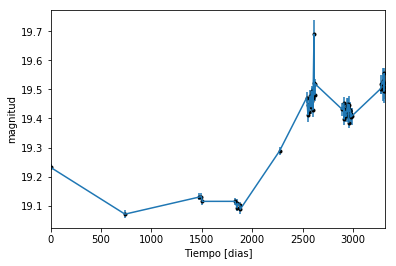

In [5]:
data = np.genfromtxt('LC_R_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [7]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [8]:
%%capture capt
sample = model.run_mcmc(20000)

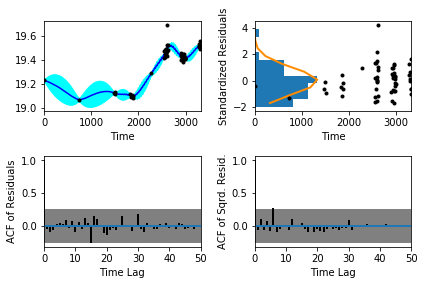

In [9]:
sample.assess_fit()


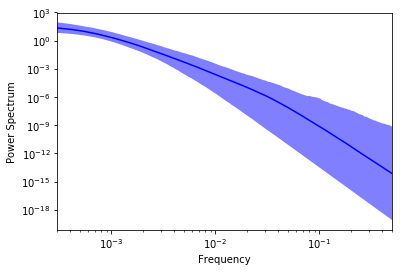

In [10]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [11]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)


Text(0.000376389,0.0419665,'Nivel de ruido')

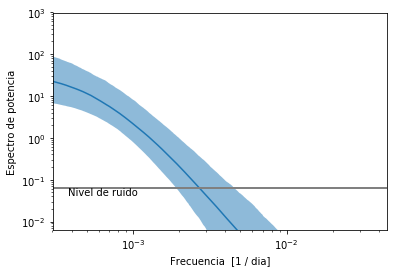

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [13]:


sample.parameters



['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 652.177135608
Median: 0.0
Standard deviation: 0.194644238534
68% credibility interval: [ 0.          0.12314634]
95% credibility interval: [ 0.          0.79375379]
99% credibility interval: [ 0.          0.94856802]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 652.177135608
Median: 0.0
Standard deviation: 0.194644238534
68% credibility interval: [ 0.          0.12314634]
95% credibility interval: [ 0.          0.79375379]
99% credibility interval: [ 0.          0.94856802]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1185.61024847
Median: 0.0
Standard deviation: 0.000146085510583
68% credibility interval: [ 0.

Plotting parameter summary


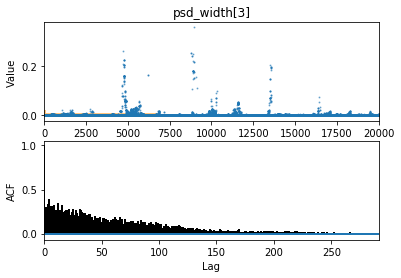

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2570.23838147
Median: 134.881687735
Standard deviation: 1.52775956497
68% credibility interval: [ 133.12649452  135.91942198]
95% credibility interval: [ 130.69120795  136.48293516]
99% credibility interval: [ 128.64962617  136.72254178]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1080.15194977
Median: 0.521763294501
Standard deviation: 2.01716506921
68% credibility interval: [ 0.03675796  3.59265935]
95% credibility interval: [ 0.01118594  6.48946208]
99% credibility interval: [  8.78727220e-03   1.00083783e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 457.585275122
Median: 0.115969445801
Standard deviation: 6.88598892369
68% credibility interval: [ 0.00550464  2.90584491]
95% credibility interval: [  4.7

In [21]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2287.0032776
Median: 19.2783701971
Standard deviation: 0.111677460423
68% credibility interval: [ 19.18675325  19.37690167]
95% credibility interval: [ 19.05521667  19.50974493]
99% credibility interval: [ 18.93915061  19.63278639]


In [23]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 652.177135608
Median: 0.0
Standard deviation: 0.194644238534
68% credibility interval: [ 0.          0.12314634]
95% credibility interval: [ 0.          0.79375379]
99% credibility interval: [ 0.          0.94856802]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 652.177135608
Median: 0.0
Standard deviation: 0.194644238534
68% credibility interval: [ 0.          0.12314634]
95% credibility interval: [ 0.          0.79375379]
99% credibility interval: [ 0.          0.94856802]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1185.61024847
Median: 0.0
Standard deviation: 0.000146085510583
68% credibility interval: [ 0.

In [26]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [27]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2570.23838147
Median: 134.881687735
Standard deviation: 1.52775956497
68% credibility interval: [ 133.12649452  135.91942198]
95% credibility interval: [ 130.69120795  136.48293516]
99% credibility interval: [ 128.64962617  136.72254178]


In [30]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [31]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 330.370803992
Median: 0.0116587546396
Standard deviation: 0.198435828563
68% credibility interval: [ 0.00085261  0.19041876]
95% credibility interval: [  3.49602211e-04   7.82286271e-01]
99% credibility interval: [  3.08528705e-04   9.65325622e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1743.2296058
Median: 0.000741809812449
Standard deviation: 0.069592041157
68% credibility interval: [ 0.0003685   0.00555268]
95% credibility interval: [ 0.00030948  0.11750128]
99% credibility interval: [  3.02602509e-04   6.11654470e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 815.513878234
Median: 0.00682125858582
Standard 

In [32]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1499.13039513
Median: 0.0338040270518
Standard deviation: 0.0350654718928
68% credibility interval: [ 0.01938093  0.06607767]
95% credibility interval: [ 0.0119599   0.13402852]
99% credibility interval: [ 0.00919974  0.21892106]


In [34]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2043.786089
Median: 1.16908807573
Standard deviation: 0.176800703255
68% credibility interval: [ 1.01502651  1.35637527]
95% credibility interval: [ 0.88884124  1.58249567]
99% credibility interval: [ 0.81684221  1.74042639]


In [36]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 919.188287731
Median: 9.24339717323e-06
Standard deviation: 0.000911480893101
68% credibility interval: [  3.68531253e-07   2.57702853e-04]
95% credibility interval: [  2.28967360e-08   2.55138973e-03]
99% credibility interval: [  6.37620382e-09   5.01611626e-03]


In [38]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [39]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 882.780223649
Median: 1.95409942454e-35
Standard deviation: 235.211257685
68% credibility interval: [  2.01161278e-64   2.61955044e-13]
95% credibility interval: [  2.58582613e-88   1.01107045e+00]
99% credibility interval: [  5.85337145e-98   4.01917011e+01]


In [40]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [41]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 330.370803992
Median: (-0.0732541158516-0.134167751233j)
Standard deviation: 1.74648996654
68% credibility interval: [-1.19643637-0.39180232j -0.00535710-0.04005448j]
95% credibility interval: [ -4.91524961e+00 -2.97307099e+00j  -2.19661547e-03 -1.70747341e-03j]
99% credibility interval: [ -6.06531976e+00-4.99014001j  -1.93854302e-03-0.03876909j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1743.2296058
Median: (-0.0046609285143+0.00149369213995j)
Standard deviation: 1.29880343089
68% credibility interval: [-0.03488850+1.95743121j -0.00231538+0.00215637j]
95% credibility interval: [-0.73828229+3.32243848j -0.00194455+0.j        ]
99% credibility interval: [ -3.84313838e+00+2.48788883j  -1.90130764e-03+0.1103009j ]
P

Plotting 2d PDF w KDE


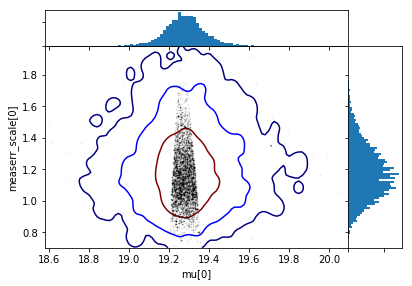

In [42]:


sample.plot_2dkde('mu', 'measerr_scale', doShow=True)



Plotting 2d PDF


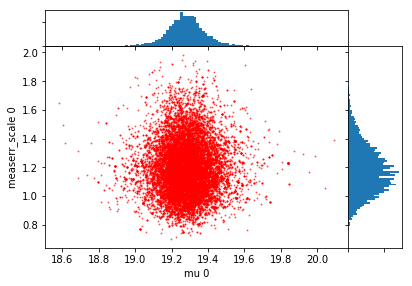

In [43]:


sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)



Plotting 2d PDF


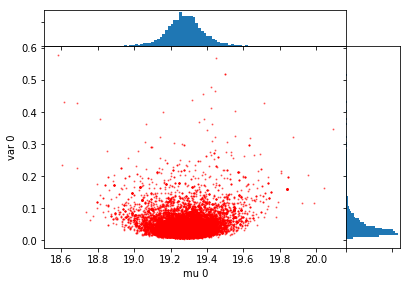

In [44]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF


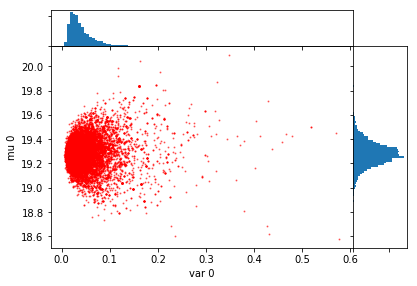

In [45]:
sample.plot_2dpdf('var', 'mu', doShow=True)

Plotting 2d PDF


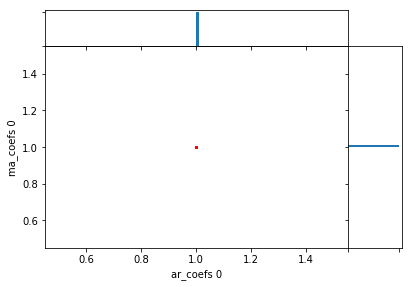

In [46]:
sample.plot_2dpdf('ar_coefs', 'ma_coefs', doShow=True)

Text(0.5,1,'Interpolation, Predicted Path')

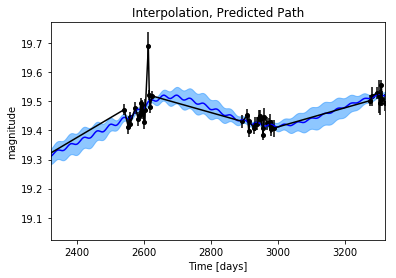

In [48]:


tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, ruta de prediccion')



Text(0.5,1,'Interpolation, Simulated Paths')

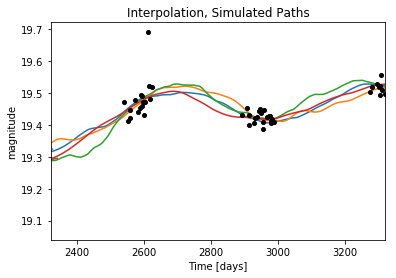

In [49]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Time [days]')
plt.ylabel('magnitude')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolation, Simulated Paths')